# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alban\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem","annêr","journal","quotidien","pages","franco","cheques",
            "postaux","publicite","compte","rossai","vente","soir",
            "rossel","abonnem","louvain","anonces","royale","france",
            "tél", "rue", "bruxelles", "ans", "prix", "très", "bon", 
            "place", "ecr", "ecrire", "articles", "article", "lire", "lecteurs", "voir", "fois", "jour", "jours",
            "mois", "année", "années", "dire", "dit", "faire", "fait", "même", "autres", "autre", "peut",
            "peut", "devoir", "deux", "trois", "quatre", "cinq", "six", "sept", "huit", "neuf", "dix",
            "premier", "deuxième", "troisième", "quatrième", "cinquième", "sixième", "septième", "huitième",
            "neuvième", "dixième","app", "brux", "prés","temps","demande","grand","part","prés","maison"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1955

In [4]:
# Lister les fichiers de cette année
data_path = '../../data'
txt_path = '../../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[1][0:200]

"JEUDI 6 JANVIER 1955 j9 LE SOIR \\ LE FOOTBALL EN PROMOTION ] L’an neuf a réveillé l’intérêt Le second tour a 616 entamé par de nombreuses surprises. Celles-ci sont à imputer à une offensive de l'hiver"

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'} ’ rr J \' 1 60\'ANNÊR- N»1 \' r>. JOURNAL QUOTIDIEN 22 Pages -1 fr. 75 r Congo Belge t 3 lr. Franco ! 20 lr. Iran;. — Suisse : 0 lr. 40 suisses CHEQUES POSTAUX PUBLICITE ! Compte n" 5675 Rossai A C ,e VENTE Soir et Soir Illustré : 14666 RossSl A C 1 * DONS aux Œuvres du Soir : 14232 Bossel A C 1 * Les manuscrits non Insérés ne sont pas rendus i i < -U VENTE. ABONNEM. : 23. PL. DE LOUVAIN ANNONCES t AC. ROSSEL. 122, R. ROYALE FRANCE t Vente, abonnements et annonces : 73. RUE D\'ANIOU, 73 — PARIS <8'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder='../../data/tmp'):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../../data/tmp/1955_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'CONGO BELGE IRAN SUISSE SUISSES ILLUSTRÉ ROSSSL DONS ŒUVRES BOSSEL MANUSCRITS INSÉRÉS RENDUS ANNONCES ABONNEMENTS ANNONCES ANIOU PARIS SALLE DEPECHES RÉDACTION PARIS BOURSE LONDRES QUEEN VICTORIA STR ZURICH MUHLEBACHSTRASSE PREMIÈRE WUII EDLLION NUIT ÉDIT NUIT SAMEDI DIMANCHE IANV TELEPHONES LIGNES ÉDITION QUELLE HEURE LAQUELLE ACHETEZ DEMANDEZ VENDEUR DERNIERE EDITION PARUE GERBE AVANT ADIEU DÉFI GRÂCE ALLONS GJIÎSER QUELQUES INSTANTS JRTIQUE POÈTES RDRONS FLÂ PEU ÉLÉGANTES GRADES ÉDIFICE PRIS '

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('PAYS', 371), ('AGENCE', 353), ('BELGIQUE', 327), ('BONNE', 326), ('PARIS', 319), ('HEURES', 319), ('COURS', 314), ('SAINT', 307), ('PEU', 292), ('ÉTAT', 286)]


### Créer, stocker et afficher le nuage de mots

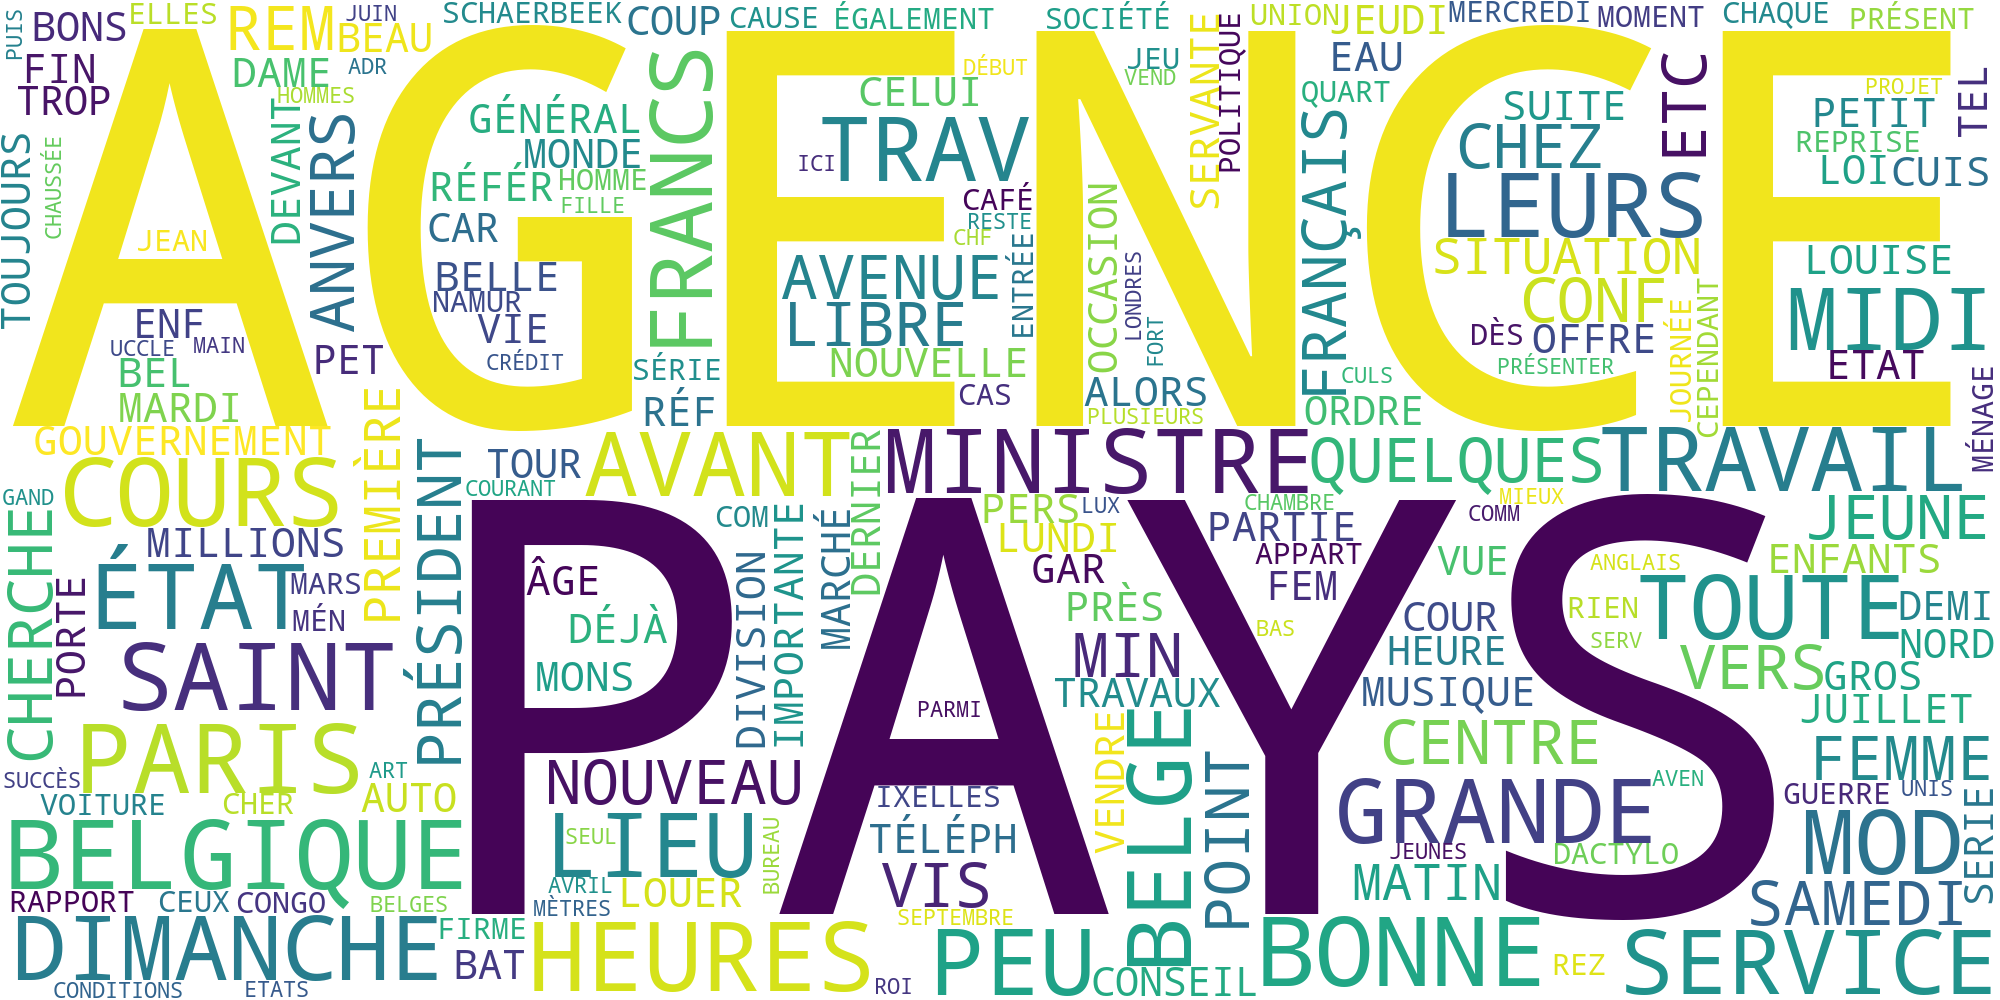

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))